In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv(r'car_data.csv')
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
data.isnull()

,User ID,Gender,Age,AnnualSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,False,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [5]:
data['Gender'].value_counts()
gender = {"Male": 0, "Female": 1}
data["Gender"] = data["Gender"].map(gender)
data

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0
...,...,...,...,...,...
995,863,0,38,59000,0
996,800,1,47,23500,0
997,407,1,28,138500,1
998,299,1,48,134000,1


<AxesSubplot:>

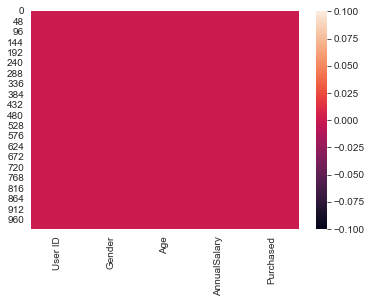

In [6]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='Purchased', ylabel='count'>

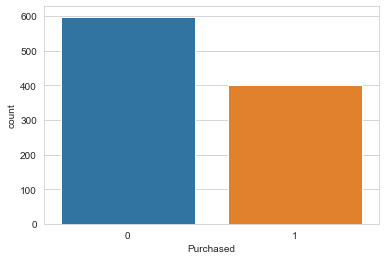

In [7]:
sns.countplot(x='Purchased',data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

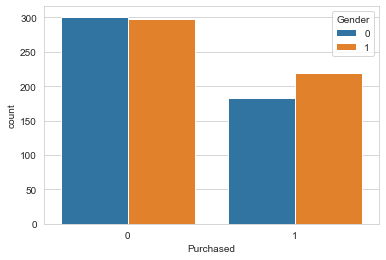

In [8]:
sns.countplot(x='Purchased',hue='Gender',data=data)

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

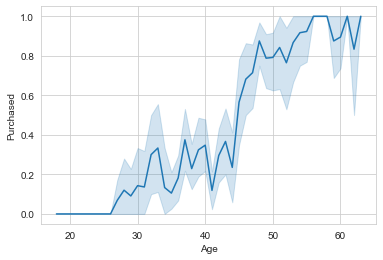

In [9]:
sns.lineplot(x='Age',y='Purchased',data=data)

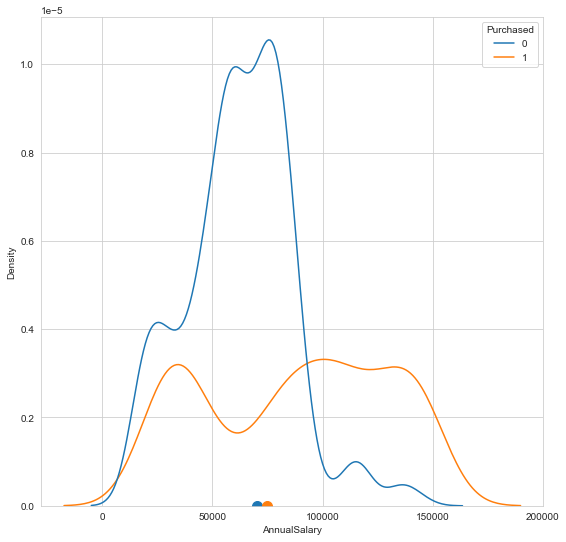

In [10]:
sal_mean_male = np.mean(data[data['Gender']==0]['AnnualSalary'].values)
sal_mean_fmale = np.mean(data[data['Gender']==1]['AnnualSalary'].values)
fig, ax = plt.subplots(figsize=(9,9))
sns.kdeplot(ax=ax, x=data['AnnualSalary'],hue=data['Purchased'])
ax.plot(sal_mean_male,0,marker='o',markersize=10)
ax.plot(sal_mean_fmale,0,marker='o',markersize=10)

In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [12]:
X_=data.drop('User ID', axis=1)
X=X_.iloc[:,:-1]
y=data.iloc[:,-1]


In [13]:
y.value_counts()

0    598
1    402
Name: Purchased, dtype: int64

In [14]:
X = scalar.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       189
           1       0.86      0.67      0.75       141

    accuracy                           0.81       330
   macro avg       0.82      0.79      0.80       330
weighted avg       0.82      0.81      0.81       330



In [18]:
confusion_matrix(y_test,y_pred)

array([[173,  16],
       [ 46,  95]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix')

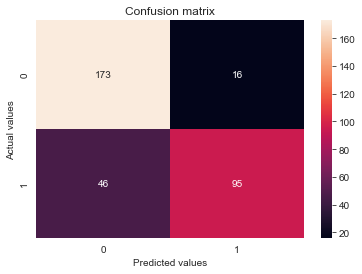

In [19]:
conf=confusion_matrix(y_test,y_pred)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X,y)

In [22]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= 0.33, random_state=42)

In [23]:
lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)
y_predict1 = lr1.predict(X_test1)

In [24]:
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       204
           1       0.83      0.80      0.81       191

    accuracy                           0.82       395
   macro avg       0.82      0.82      0.82       395
weighted avg       0.82      0.82      0.82       395



Text(0.5, 1.0, 'Confusion matrix')

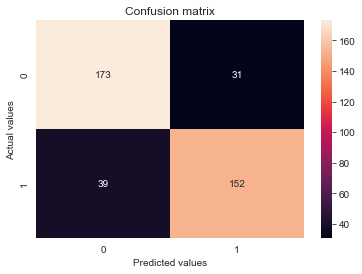

In [25]:
conf=confusion_matrix(y_test1,y_predict1)
conf=sns.heatmap(conf,annot=True,fmt='.4g')
conf.set_xlabel("Predicted values")
conf.set_ylabel("Actual values")
conf.set_title("Confusion matrix")

In [26]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=3)

In [28]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [29]:
scores_log = []
scores_svm = []
scores_rf = []
scores_xgb = []

In [30]:
for train_index, test_index in kf.split(X1, y1):
    X_train, X_test, y_train, y_test = X1[train_index], X1[test_index], y1[train_index], y1[test_index]
    scores_log.append(get_score(LogisticRegression(),X_train, X_test, y_train, y_test ))
    scores_svm.append(get_score(SVC(),X_train, X_test, y_train, y_test ))
    scores_rf.append(get_score(RandomForestClassifier(),X_train, X_test, y_train, y_test ))
    scores_xgb.append(get_score(XGBClassifier(),X_train, X_test, y_train, y_test ))

In [31]:
print("Logistic Regression Scores:\n", scores_log)
print("SVM Scores:\n", scores_svm)
print("Random Forest Scores:\n", scores_rf)
print("XG Boost Scores:\n", scores_xgb)

Logistic Regression Scores:
 [0.8070175438596491, 0.8421052631578947, 0.7562814070351759]
SVM Scores:
 [0.8972431077694235, 0.9047619047619048, 0.9120603015075377]
Random Forest Scores:
 [0.8796992481203008, 0.9072681704260651, 0.9170854271356784]
XG Boost Scores:
 [0.8621553884711779, 0.8972431077694235, 0.9020100502512562]


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [34]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [35]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [36]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [37]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.344399,0.130741,0.015870,0.009259,0.1,2,60,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.984375,0.975911,...,0.961263,0.946940,0.991862,0.979368,0.974855,0.932513,0.960106,0.964600,0.019036,13
1,0.636264,0.070933,0.008101,0.002425,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.982422,0.974609,...,0.964518,0.948242,0.989909,0.976789,0.975822,0.935838,0.967420,0.965828,0.017029,5
2,0.498214,0.136130,0.009406,0.005002,0.1,2,140,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.978516,0.973307,...,0.964518,0.947591,0.987956,0.981947,0.973243,0.939827,0.972407,0.966397,0.015874,2
3,0.952085,0.067809,0.007701,0.001100,0.1,2,180,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.977865,0.972656,...,0.965820,0.945638,0.988281,0.980658,0.971954,0.936503,0.971410,0.965545,0.016429,7
4,0.358660,0.104269,0.006604,0.000661,0.1,3,60,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.978190,0.972656,...,0.963867,0.949544,0.987305,0.979368,0.978079,0.937500,0.962766,0.964612,0.017029,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1.296214,0.178242,0.006471,0.000903,0.05,8,180,"{'learning_rate': 0.05, 'max_depth': 8, 'n_est...",0.961589,0.967448,...,0.961589,0.949870,0.990885,0.987750,0.965184,0.937500,0.949801,0.961400,0.016778,36
92,0.372977,0.091724,0.005988,0.000158,0.05,9,60,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.962565,0.956055,...,0.966146,0.956706,0.981771,0.981947,0.964861,0.938165,0.959774,0.961102,0.013426,43
93,0.329932,0.016265,0.005765,0.000396,0.05,9,100,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.964193,0.965495,...,0.965495,0.947917,0.983724,0.984526,0.967118,0.941489,0.952793,0.961708,0.014317,34
94,0.528938,0.016951,0.006002,0.000632,0.05,9,140,"{'learning_rate': 0.05, 'max_depth': 9, 'n_est...",0.962240,0.966146,...,0.964193,0.949870,0.985677,0.985816,0.965184,0.938165,0.952128,0.961245,0.015254,41


In [38]:
grid_search.best_score_

0.9667136373710509

In [39]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}